# Ford GoBike System Trip Data: 
# Comparison of Factors Leading to Longer Rides in San Francisco

## By Omar Sayed


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href='#explanatory'>Explanatory Analysis and Visualizations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
   
</ul>

## Introduction
<a id='intro'></a>
The Ford GoBike System dataset is a database of over 180,000 bike rides in the city of San Francisco. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area during the month of February. This analysis aims to show the relationship between frequency of bike rides and time of day and day of week, as well as take a glance at some of the factors that lead to longer bike rides.

### Questions

Q1. When are most trips taken in terms of time of day and day of the week?

Q2. How long does the average trip take?

Q3. Do subscribers take longer trips on average than customers?

Q4. Do customers take longer bike rides on average than subscribers throughout the day/week?

## Data Wrangling
<a id='wrangling'></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import datetime

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#load data and check first 5 rows
gobikes = pd.read_csv('201902-fordgobike-tripdata.csv')
gobikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#quick look at shape and dtypes
gobikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#descriptive statistics of quant. variables
gobikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
#checking for duplicate rows
gobikes.duplicated().sum()

0

In [6]:
#checking for missing values
gobikes.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

although they are 8000+ trips being dropped, we still have a considerably large amount of data to work with

In [7]:
#check user types
gobikes['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [8]:
#check gender variable
gobikes['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
#check bike share variable
gobikes['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### Cleaning

This dataset contains information for almost 183,000 bike rides and with 0 duplicate rows, but we can see a bunch of problems with this dataset that need to be addressed:

1. Drop all rows with missing values
2. Change start_station_id, end_station_id to int from float 
3. Change start_time and end_time dtype to datetime to extract days of week, months, hours of the day, etc...
4. duration_sec shows huge variability and range, divide by 60 into duration_min column to show duration in minutes and decrease range
5. Create Member age from member birth year column
6. Check for outliers

In [10]:
#drop missing rows
gobikes.dropna(inplace=True)
gobikes.shape

(174952, 16)

In [11]:
#changing dtypes of start and end times and birth year
gobikes['start_time'] = pd.to_datetime(gobikes['start_time'])
gobikes['end_time'] = pd.to_datetime(gobikes['end_time'])
gobikes['start_day'] = gobikes['start_time'].dt.day_name()
gobikes['start_month'] = gobikes['start_time'].dt.month_name()
gobikes['start_hour'] = gobikes['start_time'].dt.hour
gobikes['end_day'] = gobikes['end_time'].dt.day_name()
gobikes['end_month'] = gobikes['end_time'].dt.month_name()
gobikes['end_hour'] = gobikes['end_time'].dt.hour

#create member age from member birth year column
gobikes['member_age'] = (datetime.datetime.now().year - gobikes['member_birth_year']).astype(int)

#create column to reflect trip duration in minutes
gobikes['duration_min'] = gobikes['duration_sec']/60

gobikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,end_day,end_month,end_hour,member_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,Thursday,February,17,Friday,March,8,37,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,Thursday,February,12,Friday,March,5,49,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,Thursday,February,17,Friday,March,4,32,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,Thursday,February,23,Friday,March,0,47,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,Thursday,February,23,Friday,March,0,62,29.883333


In [12]:
gobikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [13]:
#checking for outliers in age variable
gobikes['member_age'].describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

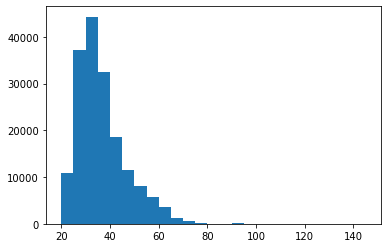

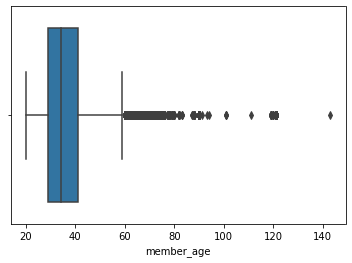

In [14]:
#plotting for better visual of outliers
plt.hist(gobikes['member_age'], bins = np.arange(np.min(gobikes['member_age']),np.max(gobikes['member_age'])+5,5))
plt.show()
sb.boxplot(gobikes['member_age']);

(10.0, 80.0)

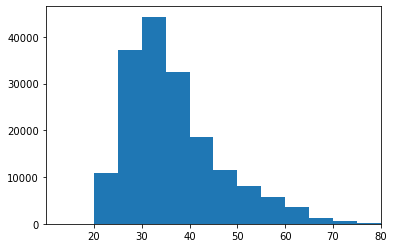

In [15]:
#zooming in on members between ages 0-80
plt.hist(gobikes['member_age'], bins = np.arange(np.min(gobikes['member_age']),np.max(gobikes['member_age'])+5,5))
plt.xticks(np.arange(np.min(gobikes['member_age']),np.max(gobikes['member_age'])+5,10))
plt.xlim(10,80)

the majority of ford gobike riders seem to be within the ages of 20-65. It makes sense to remove anyone above the age of 65 to make sure as many bike riders as possible are included in our analysis

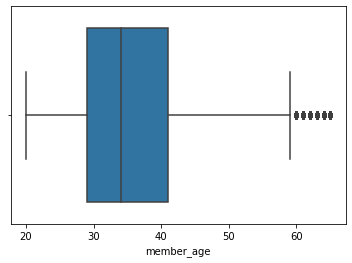

In [16]:
#dropping all members above age 65
gobikes.drop(gobikes[gobikes['member_age'] > 65].index, inplace=True)

#visualizing age variable
sb.boxplot(gobikes['member_age']);

In [17]:
gobikes['member_age'].describe()

count    173138.000000
mean         35.804901
std           9.344406
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max          65.000000
Name: member_age, dtype: float64

In [18]:
#check for outliers in duration variable
gobikes['duration_min'].describe()

count    173138.000000
mean         11.731570
std          27.464479
min           1.016667
25%           5.383333
50%           8.500000
75%          13.133333
max        1409.133333
Name: duration_min, dtype: float64

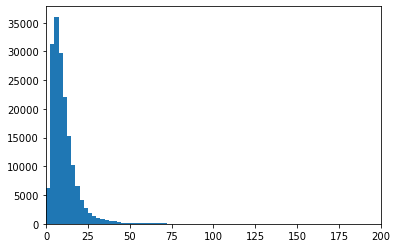

In [19]:
#histogram of ride duration in minutes limited to 60 minutes
plt.hist(gobikes['duration_min'], bins = np.arange(0,gobikes['duration_min'].max()+30,2.5))
#plt.xticks(np.arange(0,200,10))
plt.xlim(0,200)
plt.show();

In [20]:
gobikes[gobikes['duration_min'] > 60].shape[0]

1373

Here we can observe the huge variance in the duration variable, with a max value of 1400 mins and a minimum value of 1 minute, and a mean of 11 mins. A quick histogram plot shows a positively skewed(right-tailed) distribution in duration. Since only 1200 bike rides out of 174,000 are above 60 minutes, it would make sense to drop all bike rides above 60 minutes

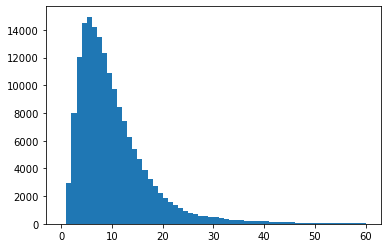

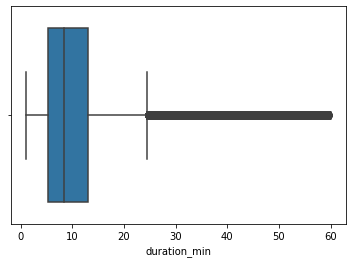

In [21]:
#dropping all rides over 60 mins
gobikes.drop(gobikes[gobikes['duration_min'] > 60].index, inplace=True)

#visualizing age variable
plt.hist(gobikes['duration_min'], bins=np.arange(0,np.max(gobikes['duration_min'])+1,1));
plt.show()
sb.boxplot(gobikes['duration_min']);

In [22]:
gobikes['duration_min'].describe()

count    171765.000000
mean         10.302645
std           7.385598
min           1.016667
25%           5.366667
50%           8.450000
75%          12.983333
max          59.933333
Name: duration_min, dtype: float64

In [23]:
#final check before EDA
gobikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171765 entries, 4 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171765 non-null  int64         
 1   start_time               171765 non-null  datetime64[ns]
 2   end_time                 171765 non-null  datetime64[ns]
 3   start_station_id         171765 non-null  float64       
 4   start_station_name       171765 non-null  object        
 5   start_station_latitude   171765 non-null  float64       
 6   start_station_longitude  171765 non-null  float64       
 7   end_station_id           171765 non-null  float64       
 8   end_station_name         171765 non-null  object        
 9   end_station_latitude     171765 non-null  float64       
 10  end_station_longitude    171765 non-null  float64       
 11  bike_id                  171765 non-null  int64         
 12  user_type       

In [24]:
gobikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,end_day,end_month,end_hour,member_age,duration_min
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,Thursday,February,23,Friday,March,0,47,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,Thursday,February,23,Friday,March,0,62,29.883333
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Female,No,Thursday,February,23,Friday,March,0,38,19.116667
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Male,No,Thursday,February,23,Friday,March,0,32,26.916667
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Other,No,Thursday,February,23,Friday,March,0,33,26.166667


## Exploratory Data Analysis (EDA)
<a id='eda'></a>

In [25]:
#define function to remove spines
def remove_spines():
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

#define function to set axis labels and title
def set_labels(xlabel,ylabel,title):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, pad = 25)
    
#setting color palette for seaborn plots
colors = sb.color_palette()[0]
_24hours = np.arange(0,25,1)

> Q1 When are most trips taken in terms of time of day, day of the week, or month of the year?

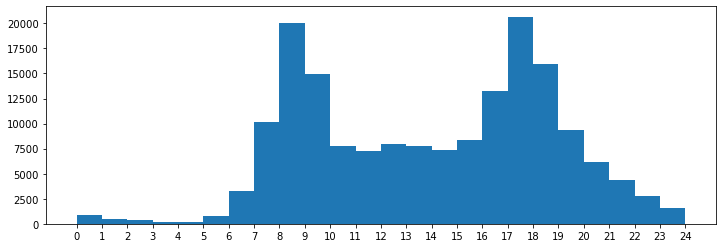

In [26]:
plt.figure(figsize = [12,4])
plt.hist(gobikes['start_hour'], bins = _24hours)
plt.xticks(_24hours);

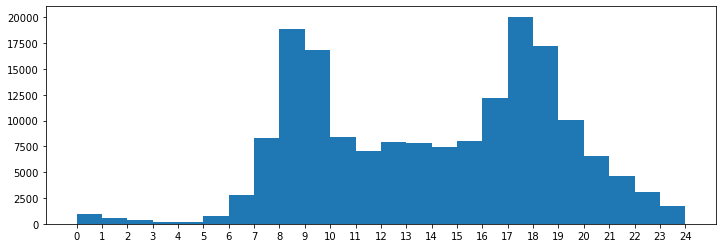

In [27]:
plt.figure(figsize = [12,4])
plt.hist(gobikes['end_hour'], bins = _24hours)
plt.xticks(_24hours);

we can see from these two histograms of bike ride frequency per time of day is bimodal, with the largest number of bike rides occuring betweeing 8-9 AM and 5-6 PM.

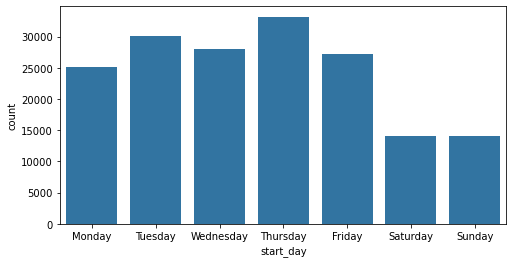

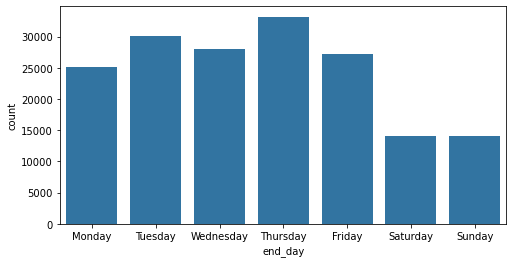

In [28]:
#Changing start_day and end_day to categorical dtype to reflect days of week
days_order = ['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow = pd.api.types.CategoricalDtype(days_order, ordered = True)
gobikes['start_day'] = gobikes['start_day'].astype(dow)
gobikes['end_day'] = gobikes['end_day'].astype(dow)

#plotting most bike rides per starting day of week
plt.figure(figsize = [8,4])
sb.countplot(gobikes['start_day'], color = sb.color_palette()[0])
plt.show()
#plotting most bike rides per ending day of week
plt.figure(figsize = [8,4])
sb.countplot(gobikes['end_day'], color = sb.color_palette()[0])
plt.show();

There is pretty much no discrepancy between the start_day and end_day counts, so only start_day variable will be used when constructing our analysis later on.

We can see that the majority of trips are taken on the weekdays compared to the weekends, with most trips taken on Thursdays. Perhaps it could be useful to know if longer trips are taken on weekdays or weekends

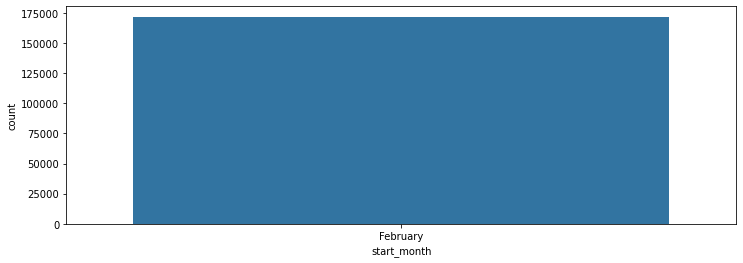

In [29]:
plt.figure(figsize = [12,4])
sb.countplot(gobikes['start_month'], color = sb.color_palette()[0]);

Interesting! This data only includes bike rides in the month of February. This will be taken note of when constructing the analysis later on

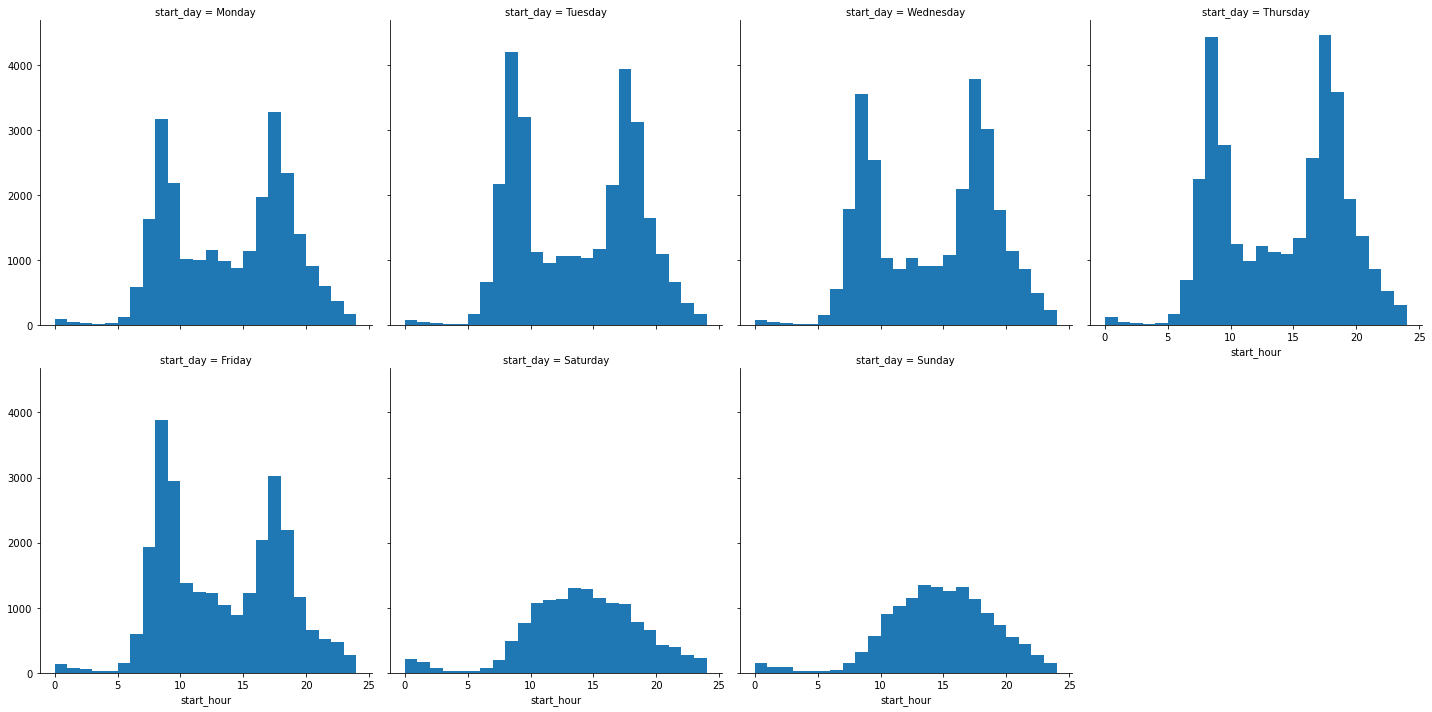

In [30]:
#Frequency of bike rides per time of day
g = sb.FacetGrid(data = gobikes, col = 'start_day', height = 5, col_wrap=4)
g.map(plt.hist, 'start_hour', bins = _24hours);

Finally, a faceted grid plot of the frequencies of bike rides per time of day on each day of the week shows a bimodal distribution during the weekdays (Mon-Fri) and unimodal distribution during the weekend. Rides during the weekend are less frequent overall than on the weekdays, but are more frequent during the aftertoon (1-3 PM) as opposed to these exact timeframes during the working week.

Q2 How long does the average trip take on average?

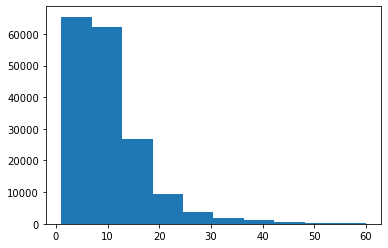

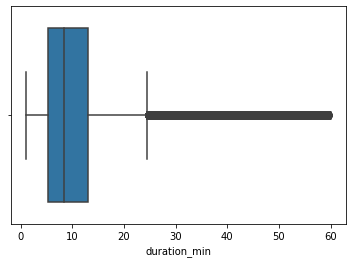

In [31]:
#plotting histogram
plt.hist(gobikes['duration_min'])
plt.show()

#boxplot of bike ride duration in minutes
sb.boxplot(gobikes['duration_min'])
plt.show();

A quick boxplot and histogram of ride duration in minutes shows a positively skewed distribution. Perhaps reducing the bin size and taking a look at the log scale would give us a better look at the distribution of ride duration in the dataset

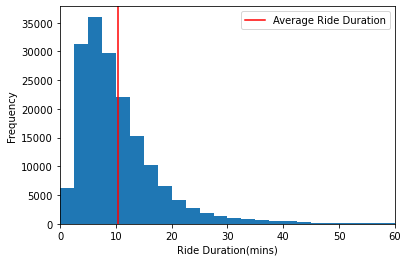

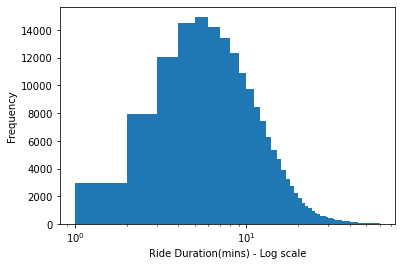

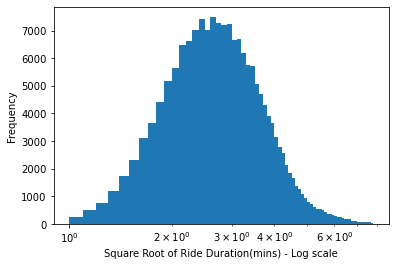

In [32]:
#histogram of ride duration in minutes limited to 60 minutes
plt.hist(gobikes['duration_min'], bins = np.arange(0,gobikes['duration_min'].max()+2.5,2.5))
plt.axvline(gobikes['duration_min'].mean(), color='red', label='Average Ride Duration')
plt.xticks(np.arange(0,70,10))
plt.legend()
plt.xlim(0,60)
plt.xlabel('Ride Duration(mins)')
plt.ylabel('Frequency')
plt.show()

#histogram of ride duration in minutes with log scale
plt.hist(gobikes['duration_min'], bins = np.arange(0,gobikes['duration_min'].max()+1,1))
plt.xscale('log')
plt.xlabel('Ride Duration(mins) - Log scale')
plt.ylabel('Frequency')
plt.show();

#plotting square root of ride duration in log scale
plt.hist(np.sqrt(gobikes['duration_min']), bins = np.arange(1,np.sqrt(gobikes['duration_min']).max()+0.1,0.1))
plt.xscale('log')
plt.xlabel('Square Root of Ride Duration(mins) - Log scale')
plt.ylabel('Frequency')
plt.show();

In [33]:
print('Average trip duration: {:.2f} mins'.format(gobikes['duration_min'].mean()))

Average trip duration: 10.30 mins


A histogram of the plot duration in mins show a positively skewed distribution with an average bike ride duration a little over 10 minutes. Plotting the log scale of the durations as well as the square root of the durations shows a normal distribution of bike ride durations overall. I wonder if this is true when broken down by time of day or weekday.

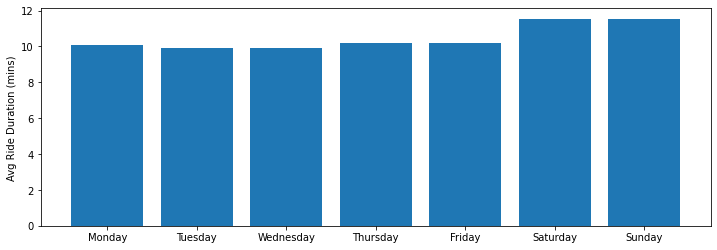

In [34]:
#grouping by start day to extract means
days_means = gobikes.groupby('start_day').mean().reset_index()

#plotting average ride duration on each day
plt.figure(figsize=[12,4])
plt.bar(data = days_means  , x='start_day', height = 'duration_min')
plt.ylabel('Avg Ride Duration (mins)');

It seems that average ride durations increase throughout the week, reaching their highest levels on Saturdays and Sundays.

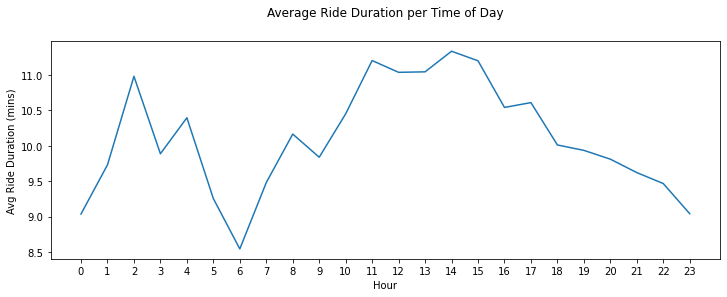

In [35]:
#creating groupby object of start hour to extract duration means
hours_means = gobikes.groupby('start_hour').mean().reset_index()

#plotting average ride duration per time of day
plt.figure(figsize=[12,4])
hours_means['duration_min'].plot()
plt.xticks(np.arange(0,24,1))
set_labels('Hour', 'Avg Ride Duration (mins)', 'Average Ride Duration per Time of Day');

A quick line plot of the average ride durations per time of day of shows that the shortest bike rides on average are at 6 AM and around midnight, with the longest bike rides on average occuring between 11 AM and 3 PM.

After looking at the average ride durations broken down by time frames, I wondered if we added another dimension to our analysis, we could see different patterns between different groups. I chose to go with the different user types to see if being a customer or a subscriber affects the length of the bike ride and how different users interact with Ford GoBikes

Q3 Do subscribers take longer trips on average than customers?

Subscriber    0.908183
Customer      0.091817
Name: user_type, dtype: float64


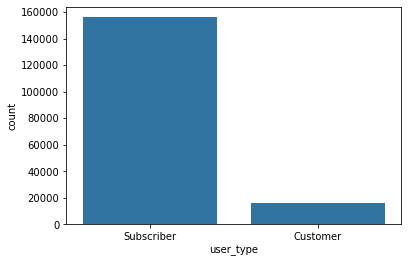

In [36]:
# number of subscribers vs number of customers
print(gobikes['user_type'].value_counts(normalize=True))

# number of subscribers vs number of customers
sb.countplot(data = gobikes, x='user_type', color = colors)
plt.show();

Interesting, it seems that the majority of bike rides are by subscribers

In [37]:
#average trip duration of subscribers
subs_mean = gobikes.query('user_type == "Subscriber"')['duration_min'].mean()

#average trip duration of customers
cust_mean = gobikes.query('user_type == "Customer"')['duration_min'].mean()


print('Average trip duration for Subscribers: {:.2f} mins'.format(subs_mean))
print('Average trip duration for Customers: {:.2f} mins'.format(cust_mean));

Average trip duration for Subscribers: 9.83 mins
Average trip duration for Customers: 14.98 mins


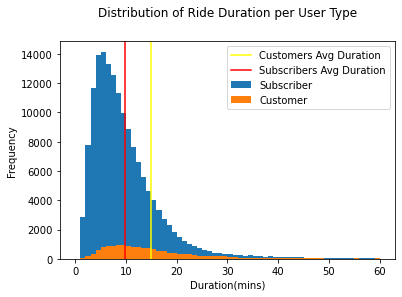

In [38]:
#plotting distribution of ride durations per user type
plt.hist(x= gobikes.query('user_type == "Subscriber"')['duration_min'], bins = np.arange(0,61,1), label = 'Subscriber')
plt.hist(x= gobikes.query('user_type == "Customer"')['duration_min'], bins = np.arange(0,61,1), label = 'Customer')
set_labels('Duration(mins)', 'Frequency', 'Distribution of Ride Duration per User Type')
plt.axvline(cust_mean, color='yellow', label='Customers Avg Duration')
plt.axvline(subs_mean, color='red', label='Subscribers Avg Duration')
plt.legend(loc='upper right')
plt.show();

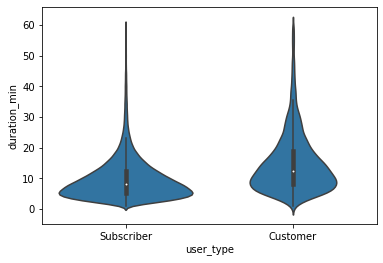

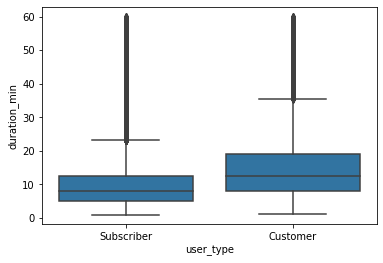

In [39]:
#violin and box plots of ride duration per user type
sb.violinplot(x=gobikes['user_type'], y=gobikes['duration_min'], color = colors)
plt.show()
sb.boxplot(x=gobikes['user_type'], y=gobikes['duration_min'], color = colors)
plt.show();

At a glance, we can see that customers take longer trips on average than subscribers, despite being less frequent overall. This will be the basis of our hypothesis test to ensure that difference in average bike ride duration is significant.

While the average ride duration for customers is ~ 5 mins longer than average ride of a subscriber, the violin and boxplot above shows some overlap in the distributions of ride durations amongst the two groups, and further testing is needed to verify that customers take longer rides on average than subscribers.

the following hypthosis will be tested

* **$H_0$**: **$p_{0}$** $\leq$ **$p_{1}$**
* **$H_1$**: **$p_{0}$** $\gt$ **$p_{1}$**

given:
**$p_{0}$** = average ride duration of customers
**$p_{1}$** = average ride duration of subscribers

In [40]:
#number of customers
n_cust =  gobikes.query('user_type == "Customer"').shape[0]

#number of subscribers
n_sub =  gobikes.query('user_type == "Subscriber"').shape[0]

#average trip duration of subscribers
subs_mean = gobikes.query('user_type == "Subscriber"')['duration_min'].mean()

#average trip duration of customers
cust_mean = gobikes.query('user_type == "Customer"')['duration_min'].mean()

#getting z-score and p-value using statsmodels z-test
z_score, p_value = sm.stats.proportions_ztest([cust_mean, subs_mean], [n_cust, n_sub], alternative = 'larger')
print('Z-score: {:.3f}\n'.format(z_score), 'p-value: {:.3f}'.format(p_value))

Z-score: 8.834
 p-value: 0.000


In [41]:
#creating dummy variable from user types with 0=subscriber, 1=customer
gobikes['customer'] = pd.get_dummies(gobikes['user_type'])['Customer']

With a z-score of 8.83, much higher than the critical value of 1.64, we can reject the null hypothesis with evidence to support the alternative. This is further supported by a p-value of 0, which less than alpha of 0.5. Thus, customers take longer rides on average than subscribers. I wonder if this is the same throughout the days the of the week.

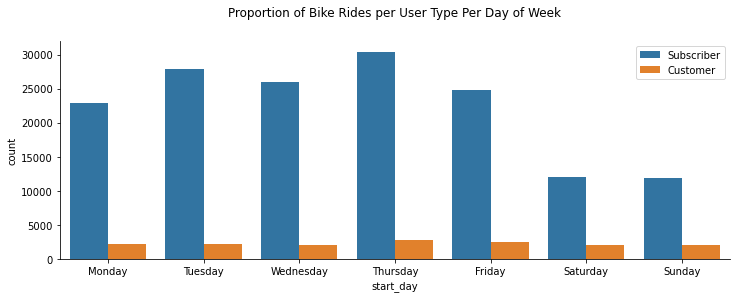

In [42]:
#distribution of bike rides per user type on each day of week
plt.figure(figsize=[12,4])
sb.countplot(data = gobikes, x='start_day', hue='user_type')
remove_spines()
plt.title('Proportion of Bike Rides per User Type Per Day of Week', pad = 25)
plt.legend()
plt.show()

Subscribers take more bike rides throughout the week than customers, with the lowest frequency of bike rides on weekends for subscribers. Surprisingly, customers frequency of bike rides is similar regardless of weekday, while subscribers take much less bike rides on weekends than weekdays.

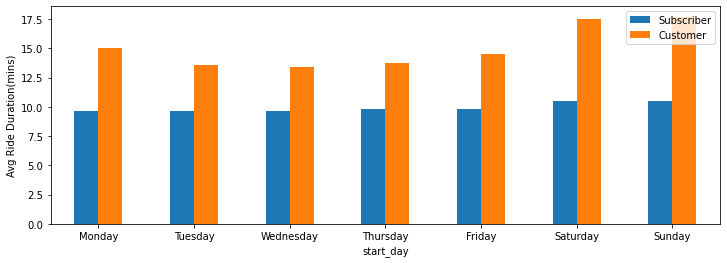

In [43]:
#creating pivot table of average ride duration per day of week
user_daymeans = gobikes.groupby(['start_day','user_type']).mean().reset_index().pivot("start_day", "user_type", "duration_min")
user_daymeans = user_daymeans[['Subscriber','Customer']] #switching order of columns for consistent plot labeling

#plotting average ride duration per day of week
user_daymeans.plot(kind='bar', figsize=[12,4])
plt.ylabel('Avg Ride Duration(mins)')
plt.legend(loc = 'upper right')
plt.xticks(rotation=0);

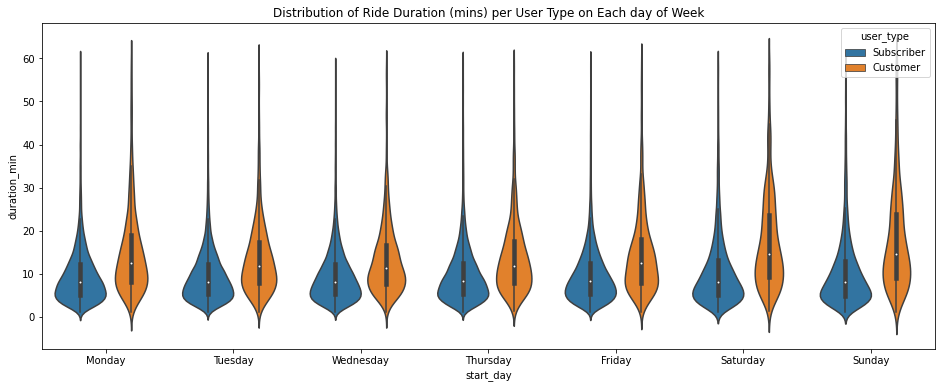

In [44]:
#distribution of ride durations per user type on each day of week
plt.figure(figsize=[16,6])
sb.violinplot(data=gobikes, x='start_day', y='duration_min', hue='user_type')
plt.title('Distribution of Ride Duration (mins) per User Type on Each day of Week');

Interestingly enough, comparing the distribution of ride durations during the days of the week, as well as the average ride duration on each day of the week, shows that customers are more likely take longer rides on average regardless of day of week, and taking even longer rides on weekends, than on weekdays. Perhaps we can include them in our regression model. Instead of testing for each day individually, let's test for weekdays and weekend to reduce the number of variables in the model. We will also be creating a third variable to test the interaction between user type and day of week

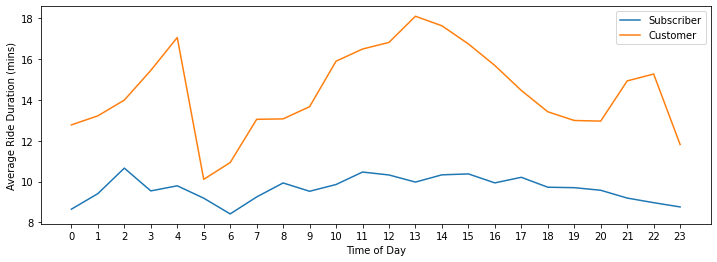

In [45]:
subs_hourmeans = gobikes.query('user_type == "Subscriber"').groupby('start_hour').mean().reset_index()
cust_hourmeans = gobikes.query('user_type == "Customer"').groupby('start_hour').mean().reset_index()

#plotting line charts of average ride duration on each hour according to user type
plt.figure(figsize=[12,4])
subs_hourmeans['duration_min'].plot(label='Subscriber')
cust_hourmeans['duration_min'].plot(label='Customer')
set_labels('Time of Day', 'Average Ride Duration (mins)','')
plt.xticks(np.arange(0,24,1))
plt.legend()
plt.show();

Another interesting insight is that customers' shortest rides on average occur at around 5 AM as opposed to 6 AM for subscribers. Longest rides on average for customers occur between 12-3 PM while longest rides on average for Subscribers occur around 2 AM.

In [46]:
#create new weekday variable where 0= weekend, 1= weekday
weekend = ['Saturday','Sunday']
gobikes['weekend'] = np.where(gobikes['start_day'].isin(weekend),1,0)

#create new variable to measure interaction betweeen user type and weekday
gobikes['customer_weekend'] = gobikes['customer']*gobikes['weekend']

gobikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_month,start_hour,end_day,end_month,end_hour,member_age,duration_min,customer,weekend,customer_weekend
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,February,23,Friday,March,0,47,26.416667,0,0,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,February,23,Friday,March,0,62,29.883333,0,0,0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,February,23,Friday,March,0,38,19.116667,0,0,0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,February,23,Friday,March,0,32,26.916667,0,0,0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,February,23,Friday,March,0,33,26.166667,0,0,0


In [47]:
#create intercept variable
gobikes['intercept'] = 1

#running multiple linear regression including user type and weekday
lm = sm.OLS(gobikes['duration_min'], gobikes[['intercept','customer', 'weekend', 'customer_weekend']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           duration_min   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     2762.
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        04:43:11   Log-Likelihood:            -5.8313e+05
No. Observations:              171765   AIC:                         1.166e+06
Df Residuals:                  171761   BIC:                         1.166e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            9.7093      0.020    489.069      0.000       9.670       9.748
customer             4.3541      0.070     62.490      0.000       4.218       4.491
weekend              0.7809      0.051     15.416      0.000       0.682       0.880
customer_weekend     2.7597      0.140     19.660      0.000       2.485       3.035
==============================================================================
Omnibus:                    77949.699   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           487782.153
Skew:                           2.112   Prob(JB):                         0.00
Kurtosis:                      10.093   Cond. No.                         8.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Given a p-value of 0 for all variables in our multiple linear regression model, which is less than alpha of 0.05, then we can assume that the day of week and user type are both predictors of whether or not the duration of the bike ride will be longer. We should not expect to have any rides lower than 9.7 minutes, and assuming all else is constant, customers are more likely to ride 4.3 minutes longer on average than subscribers. While on weekends they only ride 2.7 more minutes than subscribers on average.
Furthermore, rides are 0.7 minutes longer on averag on weekends than weekdays.
However, with r-squared score of 0.046, I would expect that this model does not cover all factors that lead to longer bike rides.

## Explanatory Analysis
<a id='explanatory'></a>

___Q1. When are most trips taken in terms of time of day, day of the week?___

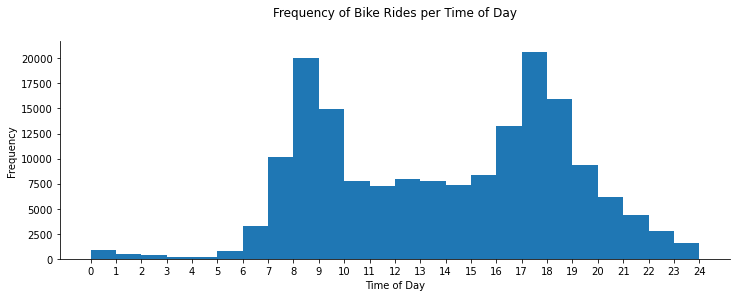

In [48]:
#Plot frequency of bike rides per time of day
plt.figure(figsize = [12,4])
plt.hist(gobikes['start_hour'], bins = np.arange(0, 25, 1))
set_labels('Time of Day', 'Frequency','Frequency of Bike Rides per Time of Day')
remove_spines()
plt.xticks(np.arange(0, 25, 1))
plt.show();

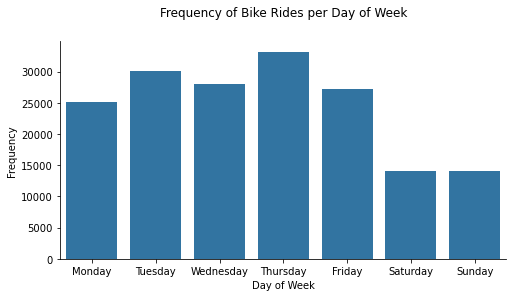

In [49]:
#plotting most bike rides per starting day of week
plt.figure(figsize = [8,4])
sb.countplot(gobikes['start_day'], color = colors)
set_labels('Day of Week','Frequency','Frequency of Bike Rides per Day of Week')
remove_spines()
plt.show();

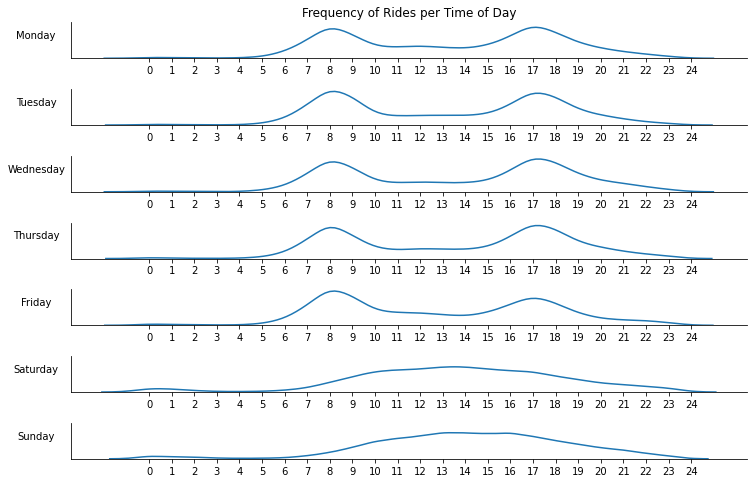

In [50]:
#Frequency of bike rides per time of day
g = sb.FacetGrid(data = gobikes, row = 'start_day', aspect=10, height=1)
g.map(sb.kdeplot, 'start_hour')
g.set(yticks=[], xlabel = '')


for i, axes_row in enumerate(g.axes):
    for j, axes_col in enumerate(axes_row):
        col, row = axes_col.get_title().split('=')

        if i == 0:
            axes_col.set_title('Frequency of Rides per Time of Day')
            g.set(xticks = np.arange(0,25,1))
            g.set_xticklabels(labels = np.arange(0,25,1))
        else:
            axes_col.set_title('')

        if j == 0:
            ylabel = axes_col.get_ylabel()
            axes_col.set_ylabel(row.strip() + ylabel, rotation=0, labelpad = 35)

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
plt.show();

As observed from the above 3 figures, we can see that the highest number of rides occur on Tuesdays, followed closely by Thursdays. The most common time of day for bike riding is at the hours of 8-9 AM and 5-6 PM.<br> 
A closer look at the frequency of bike rides according to the time of day on each day shows that weekend days are different than weekdays, where rides are most frequent around 12-4 PM on Saturdays and Sundays, as opposed to the other days of the week.<br>Another interesting observation is that bike rides are less frequent on Friday evenings compared to the rest of the weekday evenings.

___Q2 How long does the average trip take?___

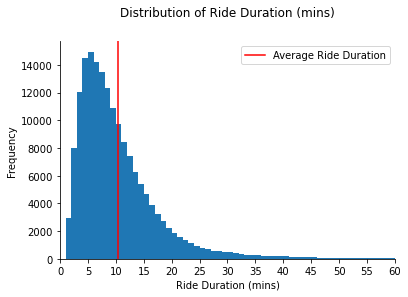

Average Trip Duration: 10 minutes


In [51]:
#histogram of ride duration in minutes limited to 60 minutes
plt.hist(gobikes['duration_min'], bins = np.arange(0,gobikes['duration_min'].max()+1,1))
plt.axvline(gobikes['duration_min'].mean(), color='red', label='Average Ride Duration')
plt.xticks(np.arange(0,65,5))
plt.xlim(0,60)
set_labels('Ride Duration (mins)', 'Frequency', 'Distribution of Ride Duration (mins)')
remove_spines()
plt.legend()
plt.show()

print('Average Trip Duration: {:.0f} minutes'.format(gobikes['duration_min'].mean()))

A histogram of the ride duration in minutes shows a positively skewed distribution, with an average ride duration of a little over 10 minutes.

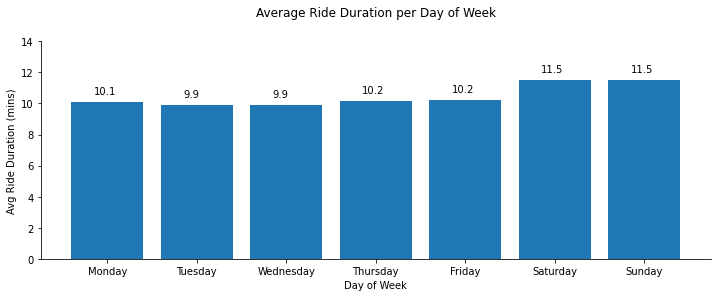

In [52]:
#plotting bar chart of average ride duration per weekday
plt.figure(figsize=[12,4])
plt.bar(data = days_means  , x='start_day', height = 'duration_min')
plt.yticks(np.arange(0,15,2))
remove_spines()
set_labels('Day of Week', 'Avg Ride Duration (mins)','Average Ride Duration per Day of Week')

for i, v in enumerate(days_means['duration_min']):
    plt.text(i-0.15, v+0.5, '{:.1f}'.format(v))

plt.show();

A bar chart of the average ride duration in minutes shows a negatively skewed distribution with longer rides on average being taken on weekends than on weekdays

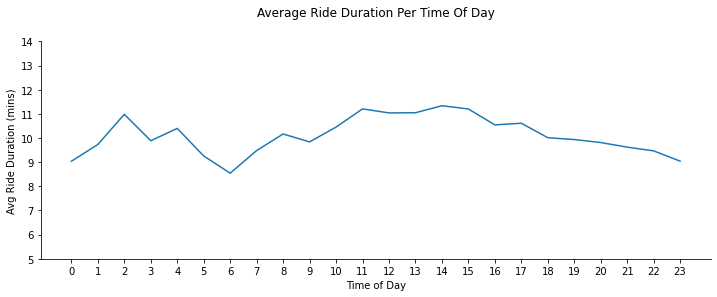

In [53]:
#plotting average ride duration per time of day
plt.figure(figsize=[12,4])
hours_means['duration_min'].plot()
plt.xticks(np.arange(0,24,1))
plt.yticks(np.arange(5,15,1))
remove_spines()
set_labels('Time of Day','Avg Ride Duration (mins)','Average Ride Duration Per Time Of Day')
plt.show();

A simple line chart of the average ride durations per time of day shows that, overall, the longest rides on average occur between the hours of 11 AM - 3 PM, with the shortest rides on average occuring at around 6 AM.

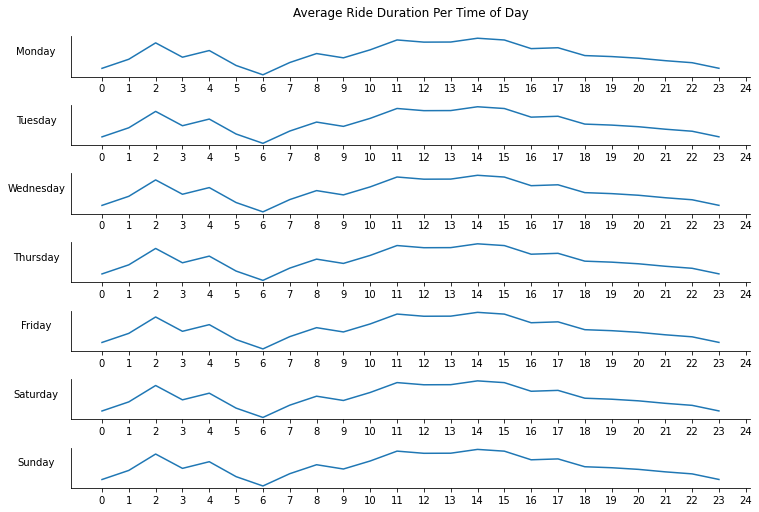

In [54]:
g = sb.FacetGrid(data = gobikes, row = 'start_day', aspect=10, height=1)
g.map(hours_means['duration_min'].plot)

g.set(yticks=[], xlabel = '')


for i, axes_row in enumerate(g.axes):
    for j, axes_col in enumerate(axes_row):
        col, row = axes_col.get_title().split('=')

        if i == 0:
            axes_col.set_title('Average Ride Duration Per Time of Day', pad=20)
            g.set(xticks = np.arange(0,25,1))
            g.set_xticklabels(labels = np.arange(0,25,1))
        else:
            axes_col.set_title('')

        if j == 0:
            ylabel = axes_col.get_ylabel()
            axes_col.set_ylabel(row.strip() + ylabel, rotation=0, labelpad = 35)

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)
plt.show();

A faceted grid of the average ride durations per time of day on each day shows a similar distribution across all days. Where the shortest rides occur at 6 AM, and longest rides occur between 11 AM - 3 PM, regardless of the day of the week.

___Q3 Do customers take longer bike rides than subscribers?___

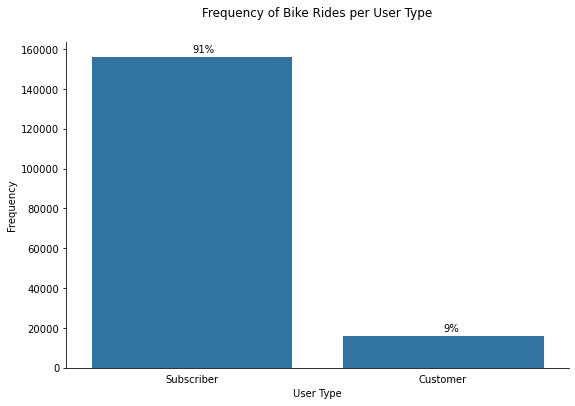

In [55]:
#plotting number of subscribers vs number of customers

props = []
for i in gobikes['user_type'].value_counts(normalize=True).values:
    props.append('{:.0%}'.format(i))


plt.figure(figsize=[9,6])
ax = sb.countplot(data = gobikes, x='user_type', color = colors)
ax.tick_params(bottom=False)
for i, v in enumerate(props):
    ax.text(i,gobikes['user_type'].value_counts()[i]+2500, v)
set_labels('User Type', 'Frequency', 'Frequency of Bike Rides per User Type')
remove_spines()
plt.show();

A large majority of bike rides are by subscribers who make up 91% of GoBike users, whereas only 9% are regular customers.

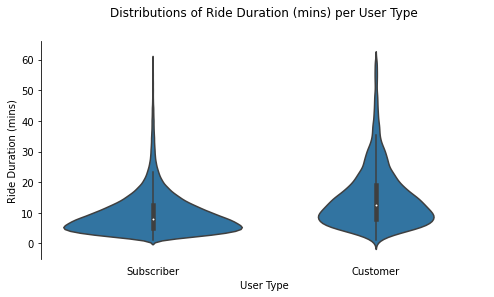

Average trip duration for Subscribers: 9.83 mins
Average trip duration for Customers: 14.98 mins


In [56]:
plt.figure(figsize = [8,4])
sb.violinplot(x=gobikes['user_type'], y=gobikes['duration_min'], color = colors)
set_labels('User Type', 'Ride Duration (mins)', 'Distributions of Ride Duration (mins) per User Type')
remove_spines()
plt.gca().spines['bottom'].set_visible(False)
plt.gca().tick_params(bottom=False)
plt.show();

print('Average trip duration for Subscribers: {:.2f} mins'.format(subs_mean))
print('Average trip duration for Customers: {:.2f} mins'.format(cust_mean));

At a glance, we can see that customers on average take longer bike rides than subscribers, despite being much less frequent. This will be the basis of our hypothesis test to ensure that difference in average bike ride duration is significant.

the following hypthosis will be tested

* **$H_0$**: **$p_{0}$** $\leq$ **$p_{1}$**
* **$H_1$**: **$p_{0}$** $\gt$ **$p_{1}$**

given:
**$p_{0}$** = average ride duration of customers
**$p_{1}$** = average ride duration of subscribers

In [57]:
#number of customers
n_cust =  gobikes.query('user_type == "Customer"').shape[0]

#number of subscribers
n_sub =  gobikes.query('user_type == "Subscriber"').shape[0]

#average trip duration of subscribers
subs_mean = gobikes.query('user_type == "Subscriber"')['duration_min'].mean()

#average trip duration of customers
cust_mean = gobikes.query('user_type == "Customer"')['duration_min'].mean()

#Compute z-score, p-value using statsmodels z-test
z_score, p_value = sm.stats.proportions_ztest([cust_mean, subs_mean], [n_cust, n_sub], alternative = 'larger')
print('Z-score: {:.3f}\n'.format(z_score), 'p-value: {:.3f}'.format(p_value))

Z-score: 8.834
 p-value: 0.000


With a z-score of 8.83 and a p-value of 0.00, above the critical value of 1.645 at an alpha of 0.05, we can reject the null hypothesis and we have sufficient evidence to support the alternative that customers do take longer bike rides on average than subscribers

___Q4: Do customers take longer bike rides on average than subscribers throughout the day/week?___

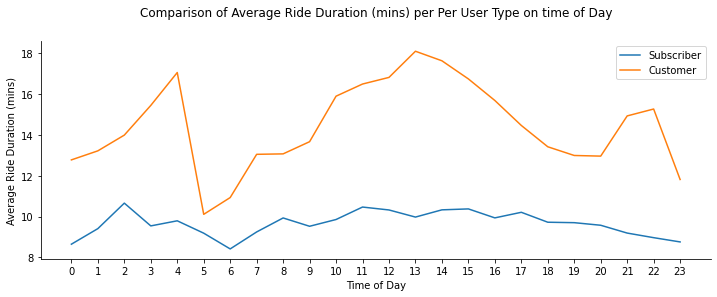

In [58]:
#plotting line charts of average ride duration on each hour according to user type
plt.figure(figsize=[12,4])
subs_hourmeans['duration_min'].plot(label='Subscriber')
cust_hourmeans['duration_min'].plot(label='Customer')
remove_spines()
set_labels('Time of Day', 'Average Ride Duration (mins)', 'Comparison of Average Ride Duration (mins) per Per User Type on time of Day')
plt.xticks(np.arange(0,24,1))
plt.legend()
plt.show();

Customers' shortest rides on average occur at around 5 AM as opposed to 6 AM for subscribers. 
Longest rides on average for Subscribers occur between 12-3 PM while longest rides on average for Subscribers occur around 2 AM.
Finally, customers take longer rides on average regardless of the time of day.

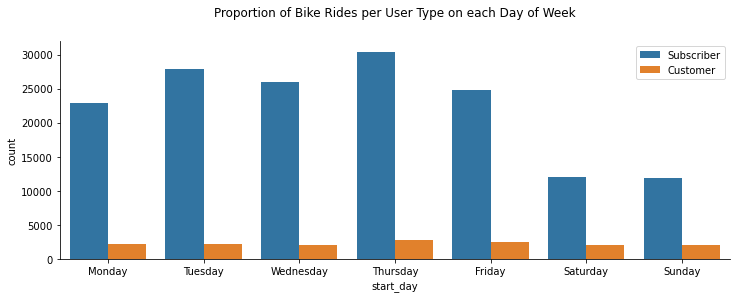

In [59]:
#distribution of bike rides per user type on each day of week
plt.figure(figsize=[12,4])
sb.countplot(data = gobikes, x='start_day', hue='user_type')
remove_spines()
plt.title('Proportion of Bike Rides per User Type on each Day of Week', pad = 25)
plt.legend()
plt.show()

We can see that customers take a similar amount of bike rides throughout the week, while subscribers are less frequent on weekends than weekdays

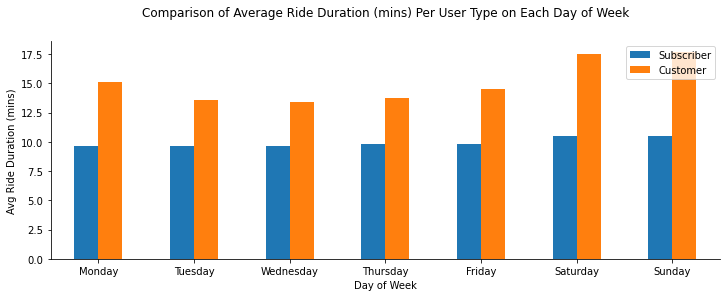

In [60]:
#comparing average ride durations of users on each day 
user_daymeans.plot(kind='bar', figsize=[12,4])
plt.legend(loc='upper right')
plt.xticks(rotation=0)
remove_spines()
set_labels('Day of Week', 'Avg Ride Duration (mins)', 'Comparison of Average Ride Duration (mins) Per User Type on Each Day of Week')

An interesting insight we can see from the two graphs above is that while customers take similarly frequent rides on weekdays, they take longer rides on average during weekends. On the other hand, subscribers take similarly long rides throughout the week regardless of weekday.<br>
<br>
Overall, customers take longer rides on average regardless of weekday.

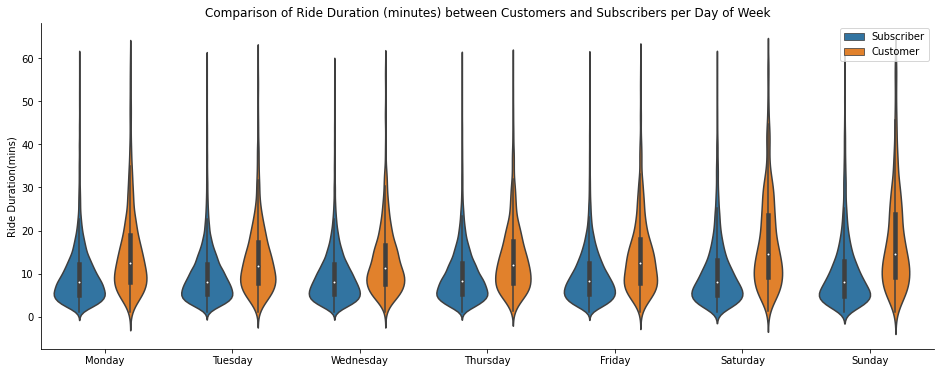

In [61]:
plt.figure(figsize=[16,6])
sb.violinplot(data=gobikes, x='start_day', y='duration_min', hue='user_type')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('')
plt.ylabel('Ride Duration(mins)')
plt.title('Comparison of Ride Duration (minutes) between Customers and Subscribers per Day of Week')
plt.legend()
plt.show();

The above violin plot comparison of ride durations between customers and subscribers throughout the days of the week further affirms that customers take longer bike rides on average regardless of the day of week, which further supports our hypothesis that customers take longer bike rides than subscribers.

# Conclusion
<a id='conclusions'></a>

From this analysis, we can observe a few points regarding GoBike users: 
<ul>
<li>First, bike riding patterns are different on weekdays than on weekends, where on weekdays GoBike users are most frequent during the early morning hours of 8-9 AM and during the evening hours of 5-6 PM, whereas on weekends bike rides are most frequent during the hours of 12-4 PM.
<li>Second, when analyzing the days of week, there is a much higher frequency of bike rides on weekdays than on weekends, with Tuesdays having the highest frequency of bike rides than any other day.
<li>Third, while a large proportion of GoBike users are subscribers (91%), regular customers take significantly longer rides on average than subscribers. With an average bike ride duration of 10 minutes, customers take on average 15 minutes per bike ride, whereas subscribers ride for 9 minutes on average. Furthermore, customers take longer bike rides on average than subscribers regardless of the day of the week.
<li>In conclusion, it is recommended to reduce the number of regular customers using GoBike systems or converting them to subscribers, in order to reduce ride durations, and increase turnover of bikes when they are most needed.</ul>

## Limitations

There are some limiations in this dataset, including but not limited to:
<ul>
<li>This dataset only includes bike rides during one month, comparing bike rides throughout the year could lead to interesting results.
<li>The dataset includes bike rides only in San Franscisco. San Franscisco is a generally variable landscape in terms of topography and has some high slopes to navigate. It would be interesting to compare bike riding patterns in different cities.
</ul>